In [1]:
import numpy as np  
import pandas as pd                
import seaborn as sns               
import matplotlib.pyplot as plt             
         

In [3]:
df = pd.read_csv("mydrone_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8127 entries, 0 to 8126
Data columns (total 52 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time(millisecond)                            8127 non-null   int64  
 1   datetime(utc)                                8127 non-null   object 
 2   latitude                                     8127 non-null   float64
 3   longitude                                    8127 non-null   float64
 4   height_above_takeoff(feet)                   8127 non-null   float64
 5   height_above_ground_at_drone_location(feet)  8127 non-null   float64
 6   ground_elevation_at_drone_location(feet)     8127 non-null   float64
 7   altitude_above_seaLevel(feet)                8127 non-null   float64
 8   height_sonar(feet)                           8127 non-null   int64  
 9   speed(mph)                                   8127 non-null   float64
 10  

In [6]:
for col in df.columns.tolist():
    print(col)

time(millisecond)
datetime(utc)
latitude
longitude
height_above_takeoff(feet)
height_above_ground_at_drone_location(feet)
ground_elevation_at_drone_location(feet)
altitude_above_seaLevel(feet)
height_sonar(feet)
speed(mph)
distance(feet)
mileage(feet)
satellites
gpslevel
voltage(v)
max_altitude(feet)
max_ascent(feet)
max_speed(mph)
max_distance(feet)
 xSpeed(mph)
 ySpeed(mph)
 zSpeed(mph)
 compass_heading(degrees)
 pitch(degrees)
 roll(degrees)
isPhoto
isVideo
rc_elevator
rc_aileron
rc_throttle
rc_rudder
rc_elevator(percent)
rc_aileron(percent)
rc_throttle(percent)
rc_rudder(percent)
gimbal_heading(degrees)
gimbal_pitch(degrees)
gimbal_roll(degrees)
battery_percent
voltageCell1
voltageCell2
voltageCell3
voltageCell4
voltageCell5
voltageCell6
current(A)
battery_temperature(f)
altitude(feet)
ascent(feet)
flycStateRaw
flycState
message


In [7]:
df.head()

,time(millisecond),datetime(utc),latitude,longitude,height_above_takeoff(feet),height_above_ground_at_drone_location(feet),ground_elevation_at_drone_location(feet),altitude_above_seaLevel(feet),height_sonar(feet),speed(mph),...,voltageCell4,voltageCell5,voltageCell6,current(A),battery_temperature(f),altitude(feet),ascent(feet),flycStateRaw,flycState,message
0,5510,3/16/2022 18:39,36.559037,-89.074368,29.855644,29.855644,367.743461,397.599105,0,0.000000,...,NaN,NaN,NaN,15.88,29.950016,397.599105,29.855644,14,Waypoint,NaN
1,5610,3/16/2022 18:39,36.559037,-89.074368,30.839896,30.839896,367.743461,398.583357,0,0.000000,...,NaN,NaN,NaN,15.88,29.950016,398.583357,30.839896,14,Waypoint,Mission did take off
2,5710,3/16/2022 18:39,36.559037,-89.074368,31.824148,31.824148,367.743461,399.567609,0,0.000000,...,NaN,NaN,NaN,15.88,29.950016,399.567609,31.824148,14,Waypoint,NaN
3,5810,3/16/2022 18:39,36.559037,-89.074367,32.808400,32.808400,367.743461,400.551861,0,0.000000,...,NaN,NaN,NaN,15.88,29.950016,400.551861,32.808400,14,Waypoint,NaN
4,5910,3/16/2022 18:39,36.559037,-89.074367,33.792652,33.792652,367.743461,401.536113,0,0.223694,...,NaN,NaN,NaN,15.88,29.950016,401.536113,33.792652,14,Waypoint,NaN


In [10]:
df.columns = df.columns.str.strip().str.lower().str.replace("(", "_").str.replace(")", "")
print(df.columns)

Index(['time_millisecond', 'datetime_utc', 'latitude', 'longitude',
       'height_above_takeoff_feet',
       'height_above_ground_at_drone_location_feet',
       'ground_elevation_at_drone_location_feet',
       'altitude_above_sealevel_feet', 'height_sonar_feet', 'speed_mph',
       'distance_feet', 'mileage_feet', 'satellites', 'gpslevel', 'voltage_v',
       'max_altitude_feet', 'max_ascent_feet', 'max_speed_mph',
       'max_distance_feet', 'xspeed_mph', 'yspeed_mph', 'zspeed_mph',
       'compass_heading_degrees', 'pitch_degrees', 'roll_degrees', 'isphoto',
       'isvideo', 'rc_elevator', 'rc_aileron', 'rc_throttle', 'rc_rudder',
       'rc_elevator_percent', 'rc_aileron_percent', 'rc_throttle_percent',
       'rc_rudder_percent', 'gimbal_heading_degrees', 'gimbal_pitch_degrees',
       'gimbal_roll_degrees', 'battery_percent', 'voltagecell1',
       'voltagecell2', 'voltagecell3', 'voltagecell4', 'voltagecell5',
       'voltagecell6', 'current_a', 'battery_temperature_f', 'alt

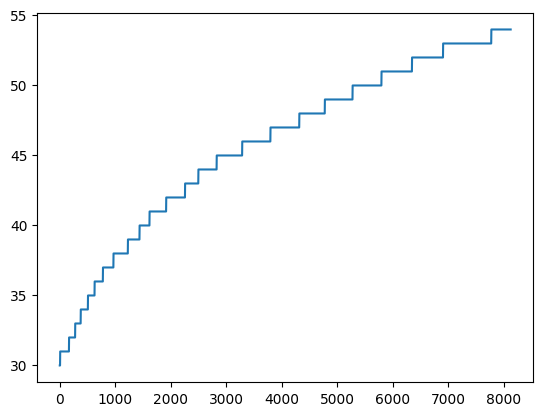

In [12]:
df["battery_temperature_f"].plot(kind="line")
plt.show()

In [26]:
print(df["latitude"].iloc[-1])
print(df["latitude"][0])

36.55902834
36.55903738


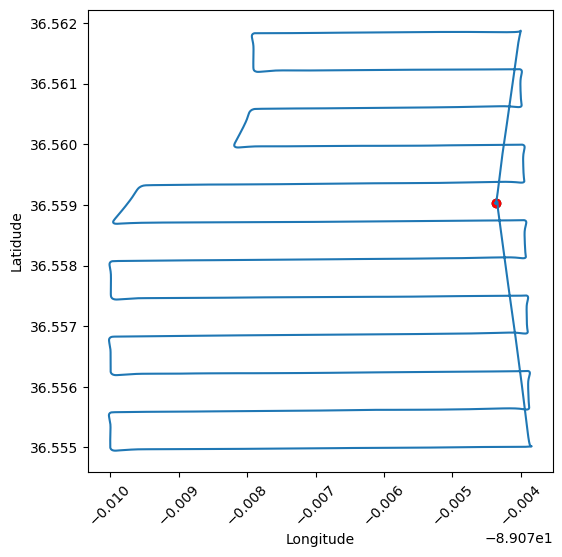

In [31]:
plt.figure(figsize=(6,6))
plt.plot(df["longitude"], df["latitude"])
plt.scatter(df["longitude"][0], df["latitude"][0], color="black")
plt.scatter(df["longitude"].iloc[-1], df["latitude"].iloc[-1], color="red")
plt.xlabel("Longitude")
plt.ylabel("Latidude")
plt.xticks(rotation=45)
plt.show()

In [37]:
df.columns

Index(['time_millisecond', 'datetime_utc', 'latitude', 'longitude',
       'height_above_takeoff_feet',
       'height_above_ground_at_drone_location_feet',
       'ground_elevation_at_drone_location_feet',
       'altitude_above_sealevel_feet', 'height_sonar_feet', 'speed_mph',
       'distance_feet', 'mileage_feet', 'satellites', 'gpslevel', 'voltage_v',
       'max_altitude_feet', 'max_ascent_feet', 'max_speed_mph',
       'max_distance_feet', 'xspeed_mph', 'yspeed_mph', 'zspeed_mph',
       'compass_heading_degrees', 'pitch_degrees', 'roll_degrees', 'isphoto',
       'isvideo', 'rc_elevator', 'rc_aileron', 'rc_throttle', 'rc_rudder',
       'rc_elevator_percent', 'rc_aileron_percent', 'rc_throttle_percent',
       'rc_rudder_percent', 'gimbal_heading_degrees', 'gimbal_pitch_degrees',
       'gimbal_roll_degrees', 'battery_percent', 'voltagecell1',
       'voltagecell2', 'voltagecell3', 'voltagecell4', 'voltagecell5',
       'voltagecell6', 'current_a', 'battery_temperature_f', 'alt

In [49]:
df[["battery_temperature_f", "max_speed_mph",'battery_percent','current_a','mileage_feet']]

,battery_temperature_f,max_speed_mph,battery_percent,current_a,mileage_feet
0,29.950016,0.000000,93,15.880,0.000000
1,29.950016,0.000000,93,15.880,0.047036
2,29.950016,0.000000,93,15.880,0.096559
3,29.950016,0.000000,93,15.880,0.141238
4,29.950016,0.223694,93,15.880,0.176650
...,...,...,...,...,...
8122,53.950100,34.145547,37,12.624,23908.629370
8123,53.950100,34.145547,37,12.624,23908.629370
8124,53.950100,34.145547,37,12.624,23908.629370
8125,53.950100,34.145547,37,12.624,23908.662180
